<a href="https://colab.research.google.com/github/souravkarma/Sourav-Karmakar-Airline-passenger-referral-prediction/blob/main/Sourav_Karmakar_Airline_passenger_referral_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb 




In [3]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [4]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the xlsx file from drive
df=pd.read_excel("/content/drive/MyDrive/Sourav Karmakar-Airline passenger referral prediction/Airline Passenger Referral Prediction/data_airline_reviews.xlsx")

In [ ]:
df.head().T

,0,1,2,3,4
airline,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN
overall,NaN,7.0,NaN,2.0,NaN
author,NaN,Christopher Hackley,NaN,Adriana Pisoi,NaN
review_date,NaN,8th May 2019,NaN,7th May 2019,NaN
customer_review,NaN,âœ… Trip Verified | London to Izmir via Istanb...,NaN,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN
aircraft,NaN,NaN,NaN,NaN,NaN
traveller_type,NaN,Business,NaN,Family Leisure,NaN
cabin,NaN,Economy Class,NaN,Economy Class,NaN
route,NaN,London to Izmir via Istanbul,NaN,Istanbul to Bucharest,NaN
date_flown,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
#let's calculate the null values 
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [5]:
#drop the null values
df.dropna(how='all',inplace=True)


In [6]:
#Counting number of duplicate values
df.duplicated().sum()

4764

In [7]:
#Droping duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [9]:
top6_airlines=df['airline'].value_counts()[0:6]
top6_airlines

Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Name: airline, dtype: int64

Text(0.5, 1.0, 'Top 6 Most Frequent Used Airlines')

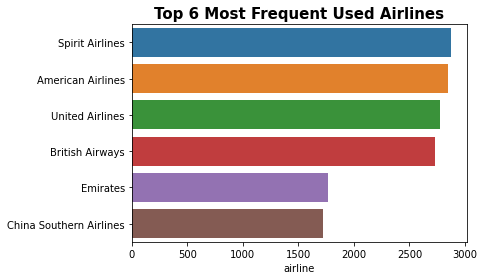

<Figure size 1440x720 with 0 Axes>

In [ ]:
#visualize top 6 most frequent used airlines
graph=sns.barplot(x=top6_airlines,y=top6_airlines.index,data=df)
plt.figure(figsize=(20,10))
graph.set_title("Top 6 Most Frequent Used Airlines",fontsize=15,fontweight='bold')

* From the Bar graph we can conclude that Spirit Airways is the most frequently used airlines with a total count of around 2800 according to the dataset given

In [ ]:
top10_aircraft=df['aircraft'].value_counts()[0:10]
top10_aircraft

A320                2130
A380                1109
Boeing 777          1101
Boeing 737-800      1021
A330                 974
Boeing 787           833
Boeing 777-300ER     737
A321                 649
Boeing 737           649
A319                 639
Name: aircraft, dtype: int64

Text(0.5, 1.0, 'Top 10 Most Frequent Used Aircraft')

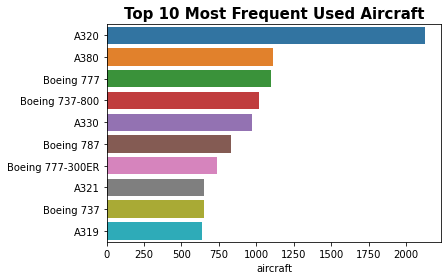

<Figure size 1440x720 with 0 Axes>

In [ ]:
#visualize top 10 most frequent used aircraft
graph=sns.barplot(x=top10_aircraft,y=top10_aircraft.index,data=df)
plt.figure(figsize=(20,10))
graph.set_title("Top 10 Most Frequent Used Aircraft",fontsize=15,fontweight='bold')

*  we can see that **aircraft A320** has travelled most frequently and also been used by most of the people.

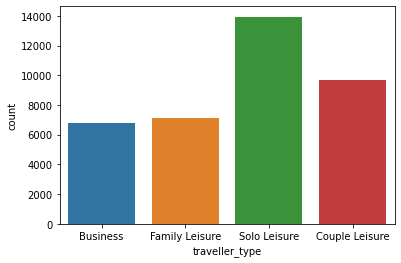

In [ ]:
sns.countplot(df['traveller_type'])

We can see there are 4 classes present in Traveller type feature. Also we can notice that Solo Leisure has highest value count. From this we can conclude that most of people who travel through airline travels in solo. Followed by College then Family. Very small percentage of people prefer flying for business.

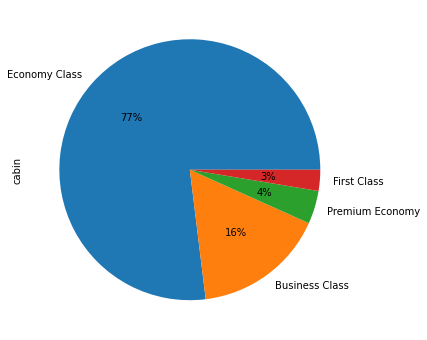

In [ ]:
# Get the number of passengers for each cabin class through pie chart visualization
df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6))

From the above graph, we have observed that-

* 77% of passengers chose to fly in economy class as this category fare is lesser.
* Only 16% chose to fly by business class.

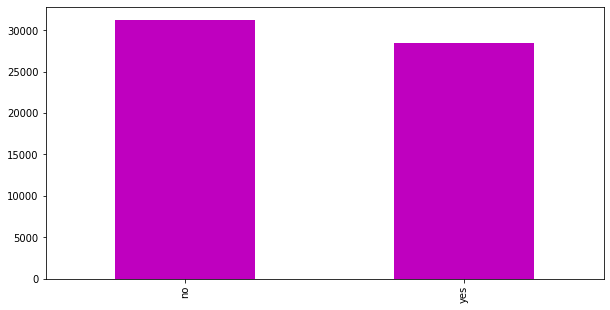

In [ ]:
#plotting bar graph to identify classes of dependent feature
plt.figure(figsize=(10,5))
df['recommended'].value_counts().plot(kind='bar',color='m')

we can see from graph that dependent feature recommendent has allmost balance feature Yes and No.

In [ ]:
df['date_flown'].array

<DatetimeArray>
['2019-05-01 00:00:00', '2019-05-01 00:00:00', '2019-05-01 00:00:00',
 '2019-04-01 00:00:00', '2019-05-01 00:00:00', '2019-05-01 00:00:00',
 '2019-04-01 00:00:00', '2019-04-01 00:00:00', '2019-04-01 00:00:00',
 '2019-02-01 00:00:00',
 ...
                 'NaT',                 'NaT',                 'NaT',
                 'NaT',                 'NaT',                 'NaT',
                 'NaT',                 'NaT',                 'NaT',
                 'NaT']
Length: 61183, dtype: datetime64[ns]

In [10]:
#changing the date_flown column from string to datetime format
df['date_flown']=df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [11]:
#crating new feature to store month
df['travel_month']=df['date_flown'].dt.month

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


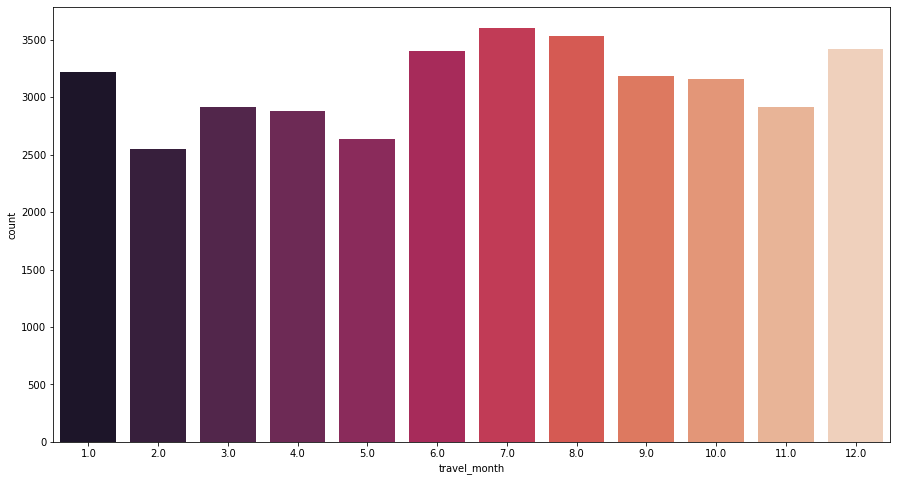

In [ ]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(15,8))
sns.countplot(df['travel_month'], color ='b',palette='rocket')

we can see from the graph
* july month is most preferred by the airline travellers and february month has lowest travel frequency.

In [16]:
#function for stacked plot for rating feature
def rating_features(r):
  x=df.groupby([df['overall']])
  x[r].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,6))


In [17]:
review_feat=['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']


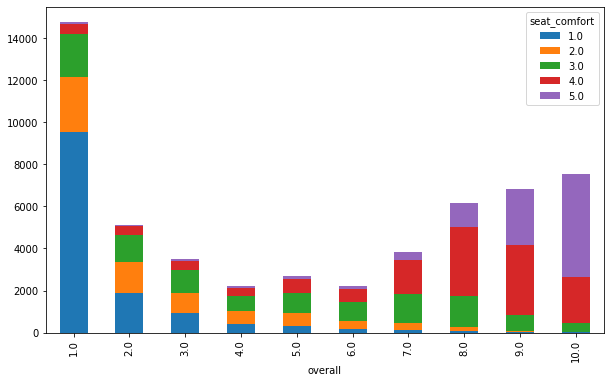

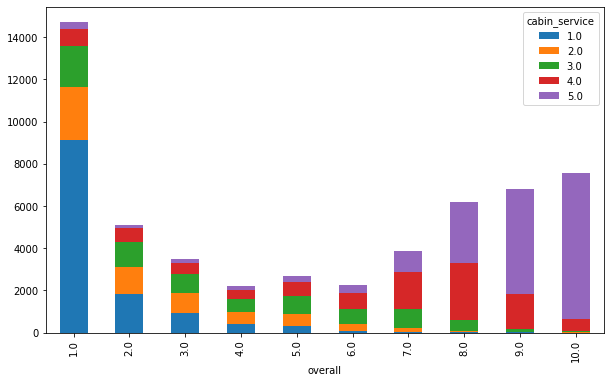

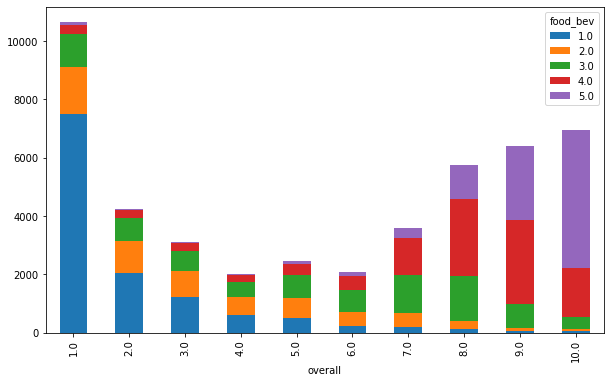

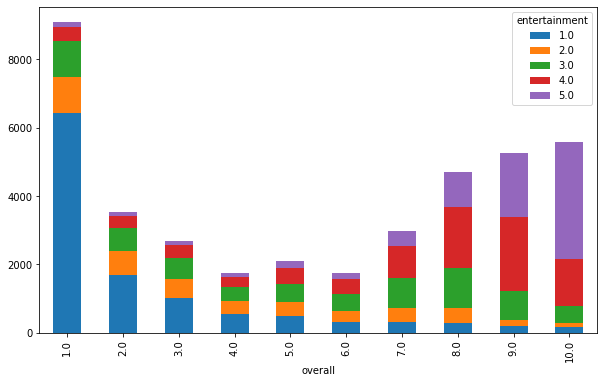

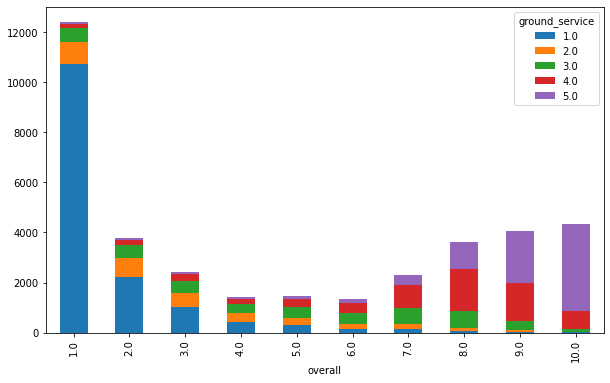

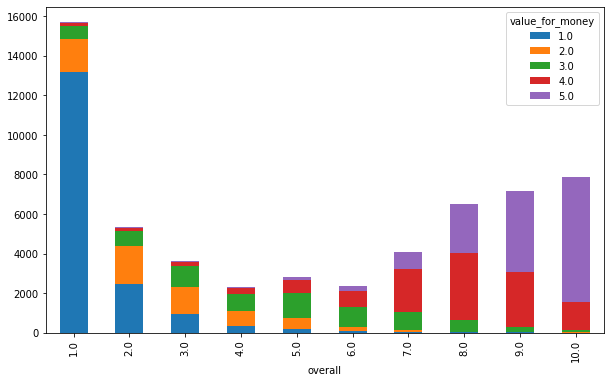

In [18]:
#get stacked plot fro review feat
for r in review_feat:
  rating_features(r)

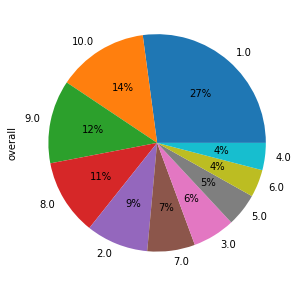

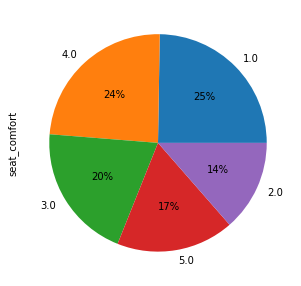

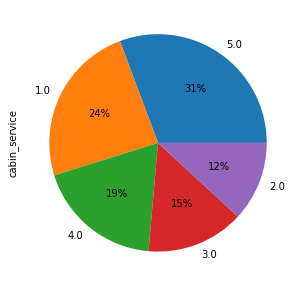

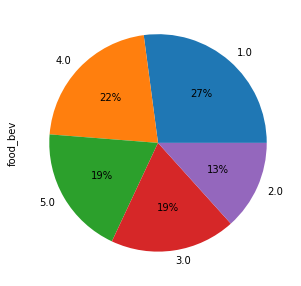

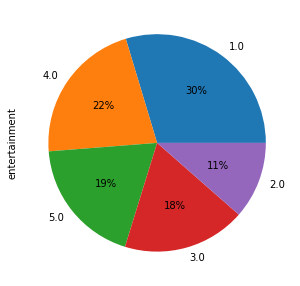

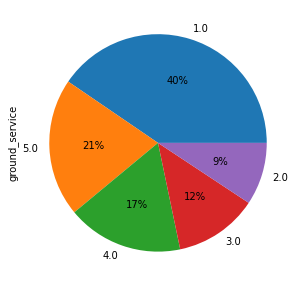

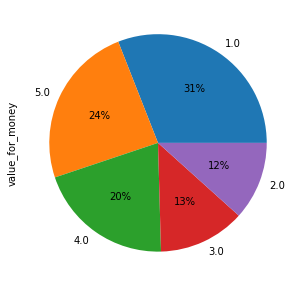

In [19]:

# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

From the above graphs, we have observed that-

44 % of passengers gave an overall rating of 7 and above on a scale of 10, for the services offered by the airlines.It implies that this section of people think that airlines are giving good services.

25 % of passengers are not satisfied with seat comfort.31% of passengers are fully statisfied with the cabin services.

41% of passengers are satisfied with food and beverages provided and 30% of passengers extremely dislikes the entertaintment service provided.

40% of passengers extremely dislikes the ground service and 44 % considers the trip to be value for money.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  seat_comfort     56211 non-null  float64       
 11  cabin_service    56240 non-null  float64       
 12  food_bev         48341 non-null  float64       
 13  entertainment    40230 non-null  float64       
 14  ground_service   37169 non-null  floa

##**Feature descriptions briefly as follows:**


*   **airline**: Name of the airline in str fromat

*   **overall**: Overall point is given to the trip between 1 to 10 in float format.


*   **author**: Author of the trip in str format


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text format in str need to be converted into DateTime Format



*  **aircraft**: Type of the aircraft in str format

*   **travellertype**: Type of traveler (e.g. business, leisure) consist of four class in str format 


*   **cabin**: Cabin at the flight date flown: Flight date in str format consist of 4 class.

*  **seatcomfort**: Rated between 1-5 in float format


*   **cabin service**: Rated between 1-5 float format

*   **foodbev**: Rated between 1-5 entertainment: Rated between 1-5 in float format


*   **groundservice**: Rated between 1-5 in float format

*   **valueformoney**: Rated between 1-5 in float format





#**Feature Engineering**

In [21]:
num_df=df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

In [22]:
#filling null values with KNN IMPUTER
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5) #n_neighbours defines no of datapoints include closer to the missing values
num_df=pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns )

In [23]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [24]:
df = df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.6+ MB


now we have to add two non-null dataframe

In [26]:
df2=pd.concat([df.reset_index(),num_df.reset_index()],axis=1)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [28]:
df2 = round(df2.select_dtypes(include=['object','float64']))


In [30]:
df2.head().T

,0,1,2,3,4
airline,Turkish Airlines,Turkish Airlines,Turkish Airlines,Turkish Airlines,Turkish Airlines
author,Christopher Hackley,Adriana Pisoi,M Galerko,Zeshan Shah,Pooja Jain
review_date,8th May 2019,7th May 2019,7th May 2019,6th May 2019,6th May 2019
customer_review,âœ… Trip Verified | London to Izmir via Istanb...,âœ… Trip Verified | Istanbul to Bucharest. We ...,âœ… Trip Verified | Rome to Prishtina via Ista...,âœ… Trip Verified | Flew on Turkish Airlines I...,âœ… Trip Verified | Mumbai to Dublin via Istan...
aircraft,NaN,NaN,NaN,A330,NaN
traveller_type,Business,Family Leisure,Business,Solo Leisure,Solo Leisure
cabin,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class
route,London to Izmir via Istanbul,Istanbul to Bucharest,Rome to Prishtina via Istanbul,Washington Dulles to Karachi,Mumbai to Dublin via Istanbul
recommended,yes,no,no,yes,no
travel_month,5.0,5.0,5.0,4.0,5.0


* here we can see that appropriate values are filled

In [31]:
#replacing yes=1 and no=0 in recommended column
df2['recommended'].replace({'yes':1,'no':0},inplace=True)

In [34]:
#check the correlation
corr=df2.corr()
corr.style.background_gradient(cmap='RdYlGn')

,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.791971,0.820029,0.803981,0.740649,0.881449,0.896356
seat_comfort,0.719521,0.000088,0.791971,1.000000,0.708728,0.725471,0.708497,0.719685,0.758560
cabin_service,0.756843,-0.005573,0.820029,0.708728,1.000000,0.776758,0.666898,0.747785,0.764541
food_bev,0.736565,-0.002793,0.803981,0.725471,0.776758,1.000000,0.729318,0.716689,0.763086
entertainment,0.668660,-0.015751,0.740649,0.708497,0.666898,0.729318,1.000000,0.671103,0.706957
ground_service,0.797478,-0.004096,0.881449,0.719685,0.747785,0.716689,0.671103,1.000000,0.822223
value_for_money,0.837220,-0.007617,0.896356,0.758560,0.764541,0.763086,0.706957,0.822223,1.000000


In [36]:
#features present in dataset
features=df2.columns
features

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended', 'travel_month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [37]:
features2= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

traveller_type


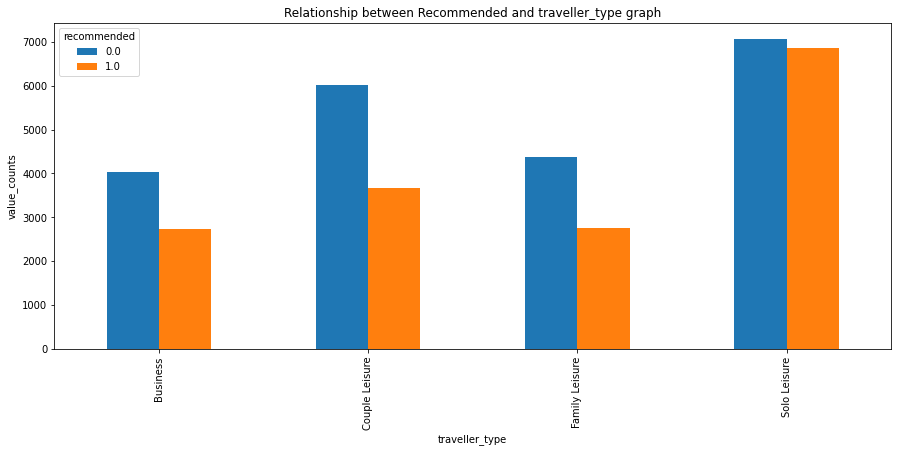

cabin


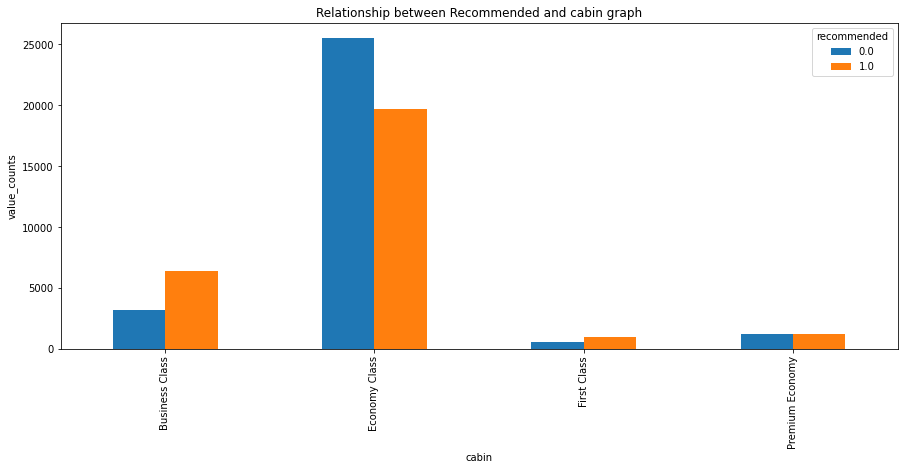

travel_month


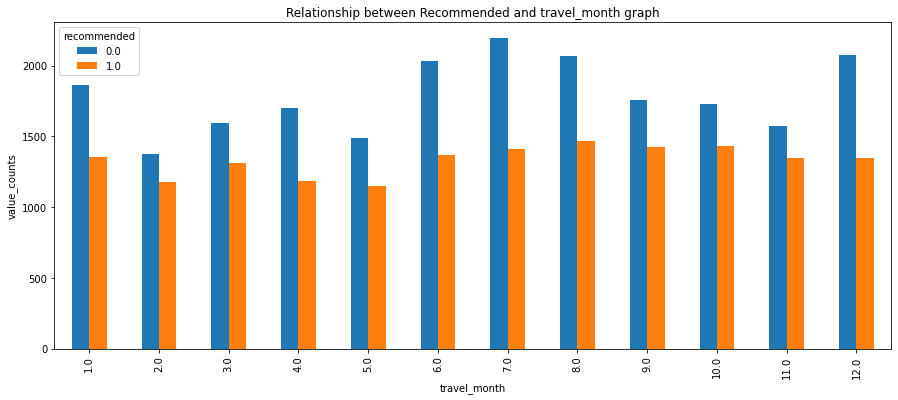

overall


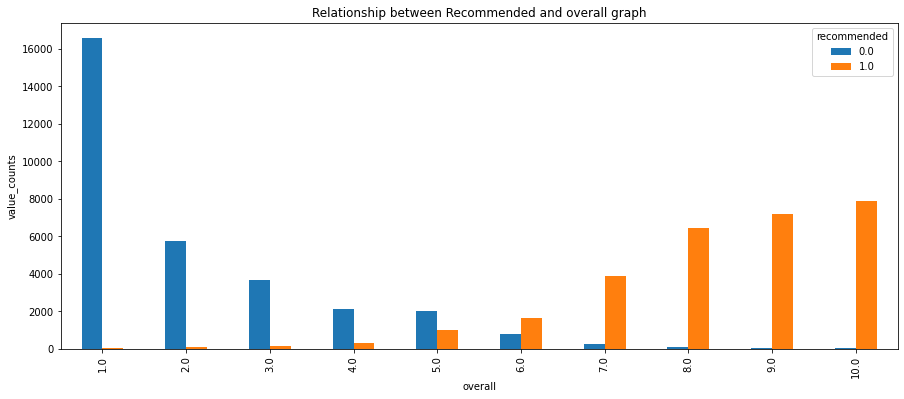

seat_comfort


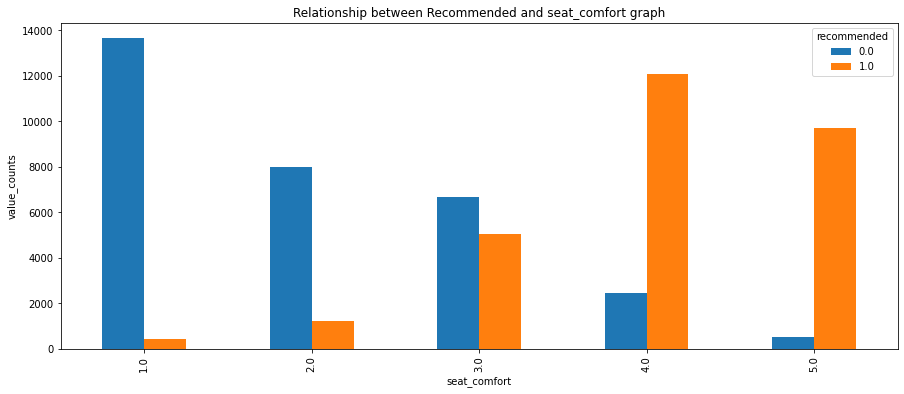

cabin_service


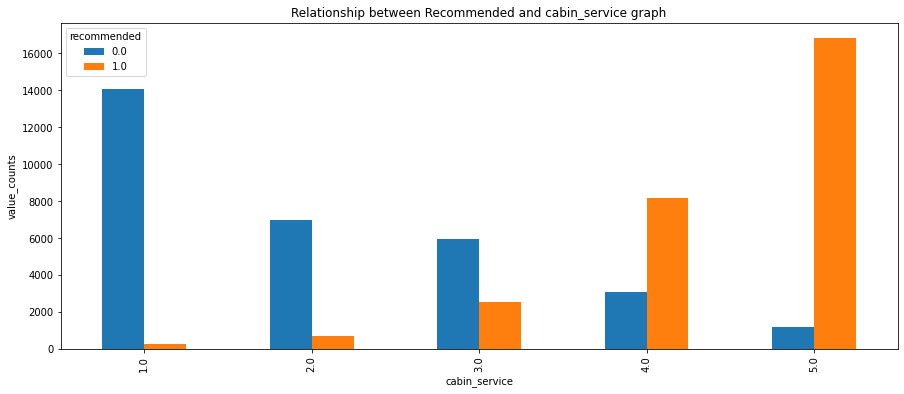

food_bev


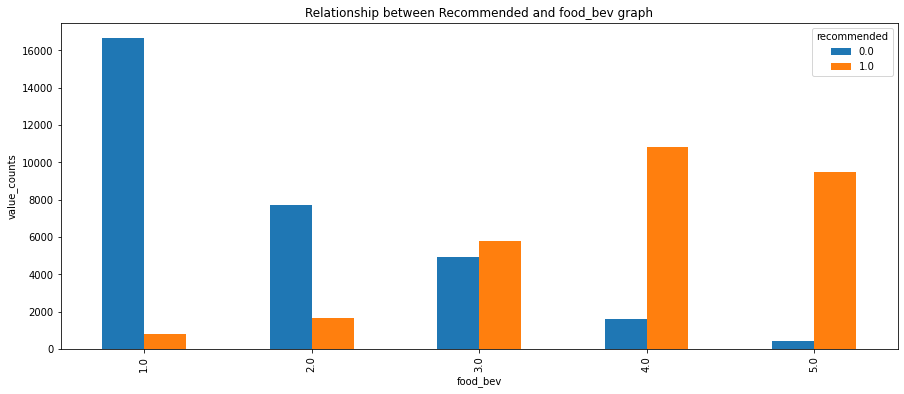

entertainment


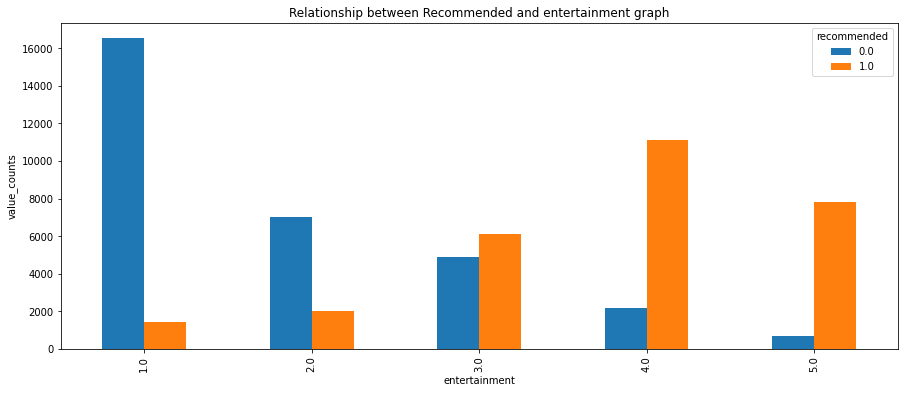

ground_service


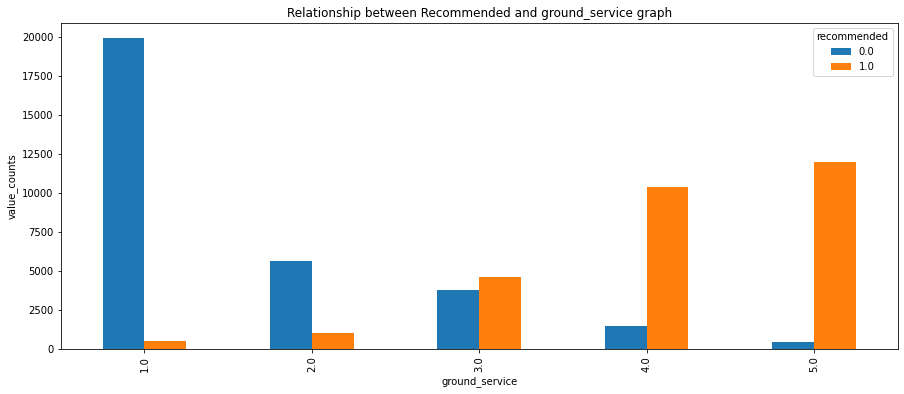

value_for_money


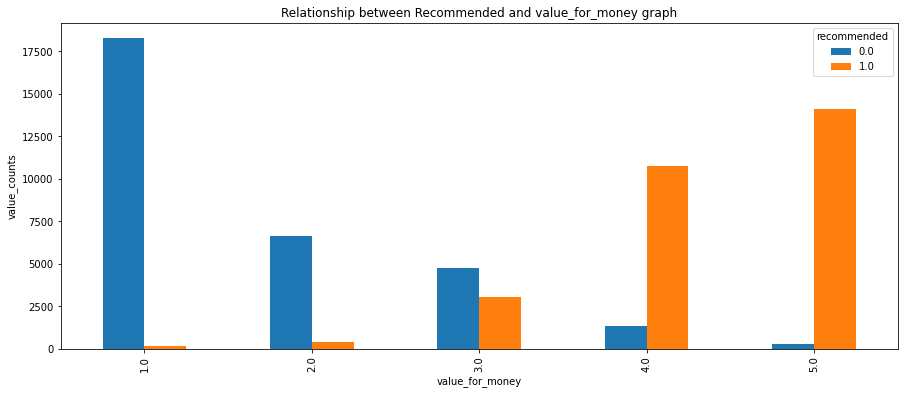

In [38]:
#plotting graph of count of feature group by target variable
for i in features2:
  print(i)
  df2.groupby([i])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f"Relationship between Recommended and {i} graph")
  plt.xlabel(i)
  plt.ylabel("value_counts")
  plt.show()



* We can conclude following things from above:
  * We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
  * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
  * From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
  * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
  * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
  * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
  * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
  * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows  that airline has to improve their entertainment system as well.
  * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows  that airline has to improve their ground service.
  * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows  that airline has to make their flight service more cost effective.

traveller_type


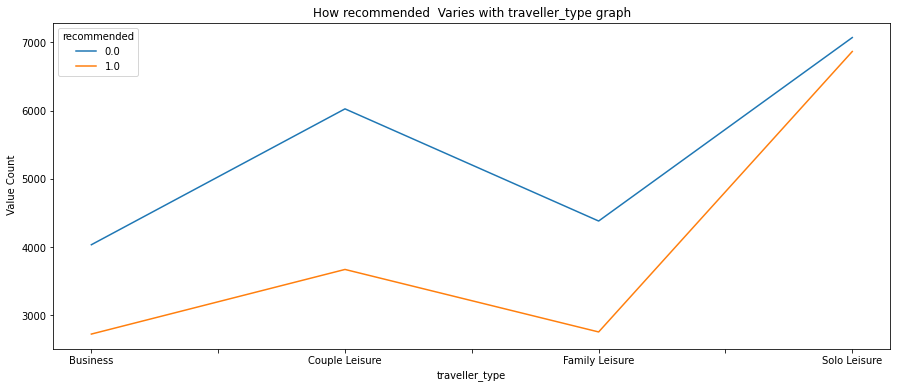

cabin


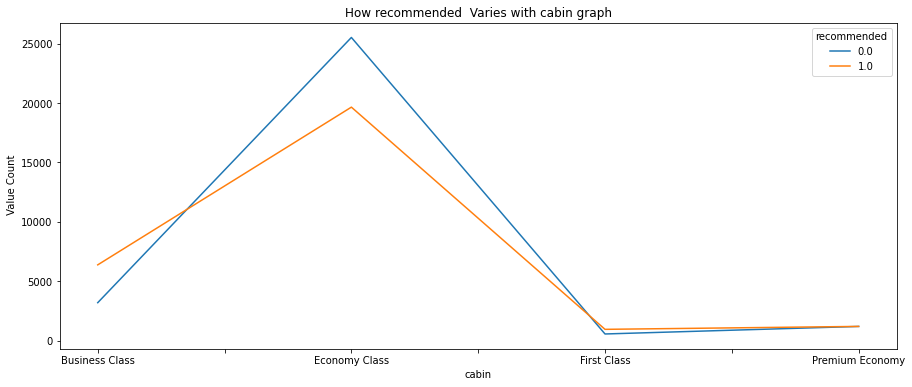

travel_month


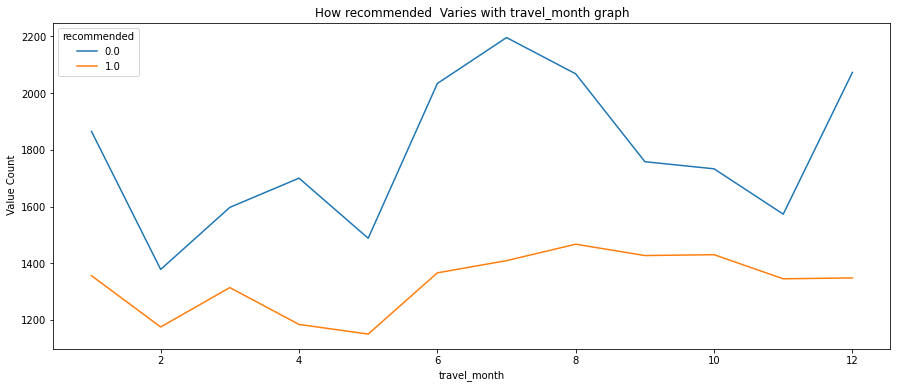

overall


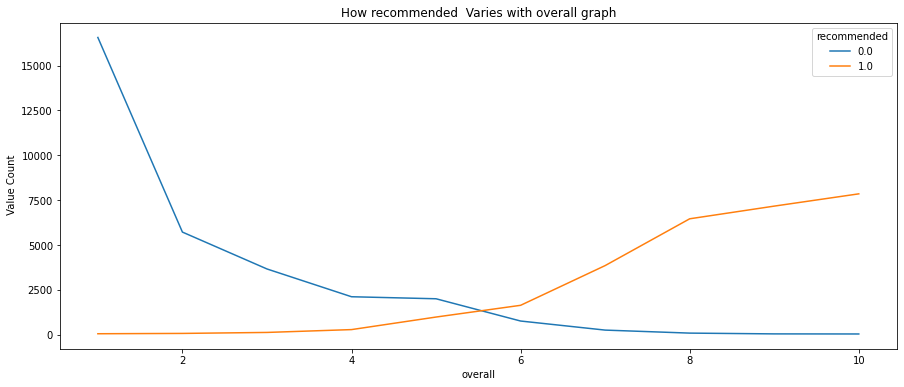

seat_comfort


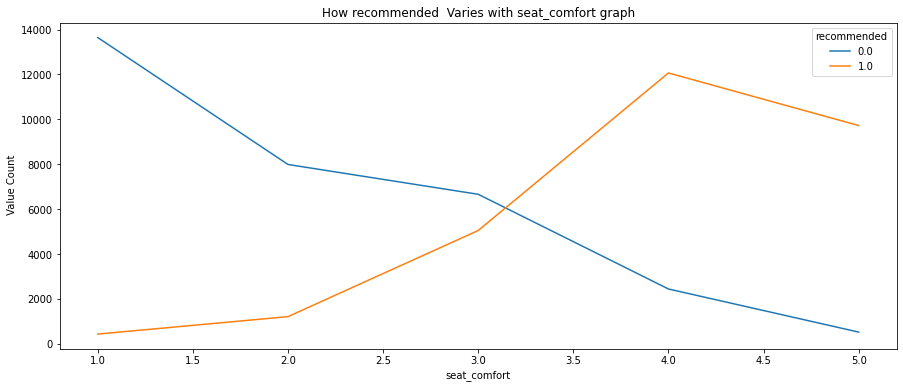

cabin_service


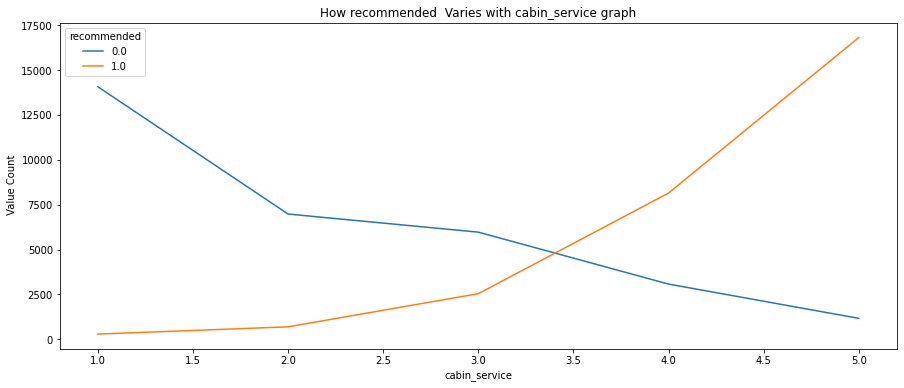

food_bev


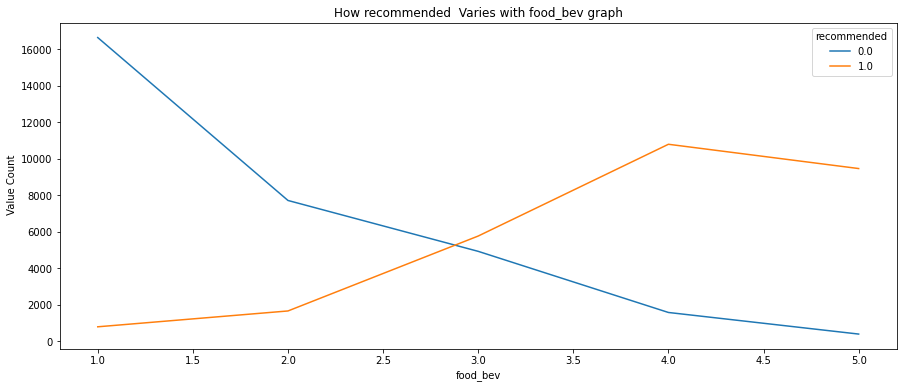

entertainment


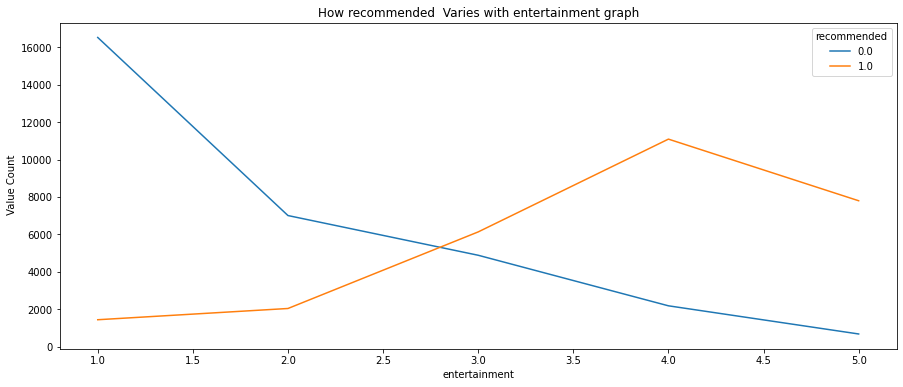

ground_service


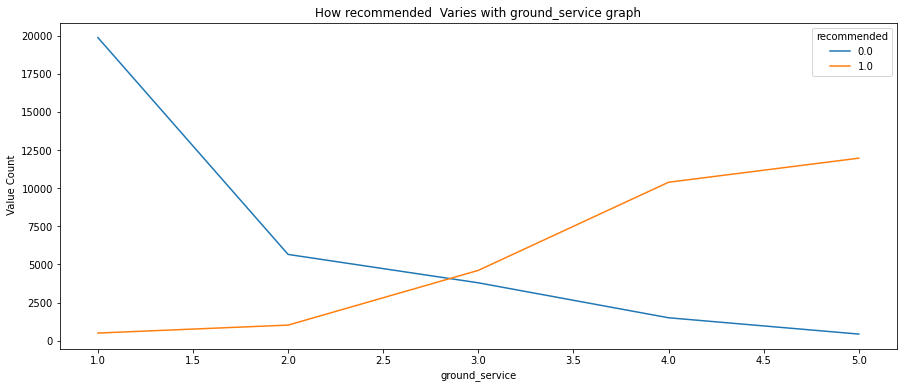

value_for_money


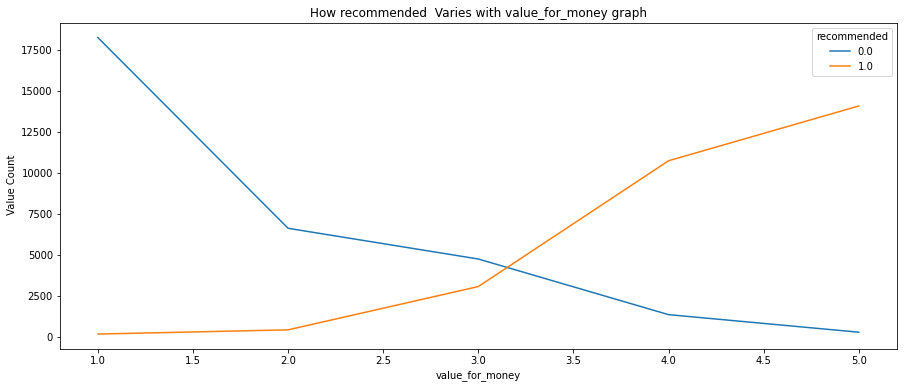

In [40]:
#Ploting line graph of count of feature grouped by target variable to analyze the trend
for feature in features2:
  print(feature)
  df2.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

* In Traveller type we can see that both the recommendation trend as of yes or no increases from business to couple leisure and decreases to family then again increases high in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.
* In Cabin type we can see that both the recommendation trend as of yes or no increases from business to Economy class and decreases to First class then again increases slightly in Premium class. Which indicate most people travel on economy class.
* In month we cannot see any preferable trend but here we can conclude people tent to travel highest during the month of July.
* In overall rating we can experience a very good insights which is also regular. We can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases. 
* In seat comfort we can see as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in seat comfort rating 3.0 where we can see similar positive and negative recommendation.
* In cabin service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in cabin service rating 3.5 where we can see similar positive and negative recommendation.
* In food service we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in food service rating close to 3.0 where we can see similar positive and negative recommendation.
* In Entertainment service too we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Entertainment service rating between 2.5 and 3.0 where we can see similar positive and negative recommendation.
* In Ground service also we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Ground service rating close 3.0 where we can see similar positive and negative recommendation.
* Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.


In [41]:
#checking the  null value if exist
df2.recommended.isna().sum()

1422

In [42]:
df2.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0


In [44]:
#dropping redundant feature which are not required 
df2.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.6+ MB


In [46]:
#notna() method returns a DataFrame object where all the values are replaced with a Boolean value True or False
df2 = df2[df2['recommended'].notna()]

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


#**NLP(Natural Language Processing) for reviews**

In [50]:
# Install vaderSentiment package
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [51]:
#Importing SentimentIntensity Analyzer Class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [52]:
#create function to get sentiment score for review
def sentiment_score(s):
  #create SentimentIntensityAnalyzer object
  sia_object=SentimentIntensityAnalyzer()
  #scoring each reviews depending on their polarity
  sentiment_dict=sia_object.polarity_scores(s)
  return sentiment_dict['compound']

In [53]:
#creatic numeric review column to find and store the polarity of each customer review
df2['numeric_review']=df2['customer_review'].apply(sentiment_score)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
 12  numeric_review   59761 non-null  float64
dtypes: float64(9), object(4)
memory usage: 6.4+ MB


In [55]:
# Check the correlation plot

corr = df2.corr()
corr.style.background_gradient(cmap='RdYlGn')

,recommended,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,numeric_review
recommended,1.000000,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220,0.699408
overall,0.898390,1.000000,0.789117,0.816663,0.802788,0.739857,0.879980,0.894839,0.725893
seat_comfort,0.719521,0.789117,1.000000,0.704709,0.725061,0.708971,0.714992,0.755456,0.593969
cabin_service,0.756843,0.816663,0.704709,1.000000,0.775825,0.665273,0.744625,0.760315,0.631408
food_bev,0.736565,0.802788,0.725061,0.775825,1.000000,0.728276,0.714309,0.761662,0.608310
entertainment,0.668660,0.739857,0.708971,0.665273,0.728276,1.000000,0.670868,0.706048,0.554105
ground_service,0.797478,0.879980,0.714992,0.744625,0.714309,0.670868,1.000000,0.820215,0.661630
value_for_money,0.837220,0.894839,0.755456,0.760315,0.761662,0.706048,0.820215,1.000000,0.671077
numeric_review,0.699408,0.725893,0.593969,0.631408,0.608310,0.554105,0.661630,0.671077,1.000000


In [56]:
#Dropping customer review to replace with numeric review.
df2.drop('customer_review' , axis =1, inplace =True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   traveller_type   37539 non-null  object 
 2   cabin            58704 non-null  object 
 3   recommended      59761 non-null  float64
 4   overall          59761 non-null  float64
 5   seat_comfort     59761 non-null  float64
 6   cabin_service    59761 non-null  float64
 7   food_bev         59761 non-null  float64
 8   entertainment    59761 non-null  float64
 9   ground_service   59761 non-null  float64
 10  value_for_money  59761 non-null  float64
 11  numeric_review   59761 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


##**One Hot encoding for categorical features**

In [57]:

# categoriacal features to do one hot encoding
cat_col =['airline','cabin','traveller_type']

In [58]:
dummy=pd.get_dummies(df2,columns=cat_col,drop_first=False)

In [59]:
dummy.columns

Index(['recommended', 'overall', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

##**Let's Split the Data to Train and Test**

In [1]:
#import libraries
from sklearn.model_selection import train_test_split